# Load Data

In [ ]:
# Import necessary libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset from Hugging Face 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Clean up the 'job_posted_date' column by converting it to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

# Analyzing Job Demand

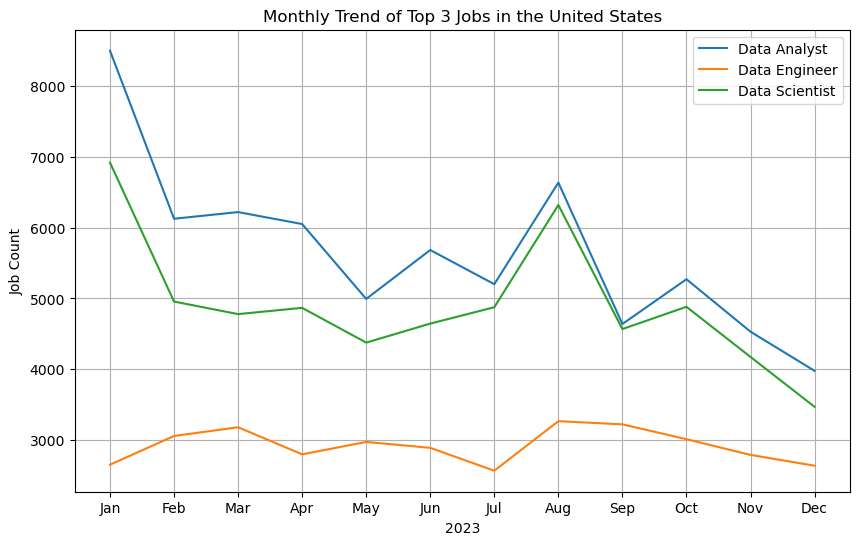

In [ ]:
# Filter the dataframe for only the United States
df_US = df[df['job_country'] == 'United States'].copy()

# Extract the month from the 'job_posted_date' column
df_US['job_posted_month'] = df_US['job_posted_date'].dt.month

# Get the top three most common job titles<
top_jobs = df_US['job_title_short'].value_counts().head(3).index

# Filter the dataframe for only the top three jobs
filtered_df_US = df_US[df_US['job_title_short'].isin(top_jobs)]

# Group by job title and month, and count the occurrences
monthly_trend = filtered_df_US.groupby(['job_title_short', 'job_posted_month']).size().reset_index(name='count')

# Pivot the data for easier plotting
pivot_trend = monthly_trend.pivot(index='job_posted_month', columns='job_title_short', values='count').fillna(0)

# Plot the trend
pivot_trend.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Trend of Top 3 Jobs in the United States')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.show()

In [8]:
pivot_trend

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_posted_month,,,
1,8494,2655,6915
2,6124,3060,4956
3,6218,3183,4779
4,6049,2801,4867
5,4993,2976,4377
6,5683,2893,4645
7,5201,2570,4876
8,6634,3269,6318
9,4639,3224,4568


In [7]:
monthly_trend

,job_title_short,job_posted_month,count
0,Data Analyst,1,8494
1,Data Analyst,2,6124
2,Data Analyst,3,6218
3,Data Analyst,4,6049
4,Data Analyst,5,4993
5,Data Analyst,6,5683
6,Data Analyst,7,5201
7,Data Analyst,8,6634
8,Data Analyst,9,4639
9,Data Analyst,10,5271


In [ ]:
# filter df from January only and save to excel format
df_US_jan = df_US[df_US['job_posted_month'] == 1]
df_US_jan.to_csv('data_jobs_january.csv', index=False)

In [ ]:
# read csv data jobs january
df_jan = pd.read_csv('data_jobs_january.csv')
df_jan

In [13]:
# filter df from January only and save to excel format
df_US_jan = df_US[df_US['job_posted_month'] == 1]
df_US_jan.to_excel('data_jobs_january.xlsx', index=False)